# API Requests - Stock Market data
Alpha Vantage API - https://rapidapi.com/alphavantage/api/alpha-vantage

# Load the api key in python variable

In [3]:
import streamlit as st

api_key = st.secrets["API_KEY"]

# Symbol Search
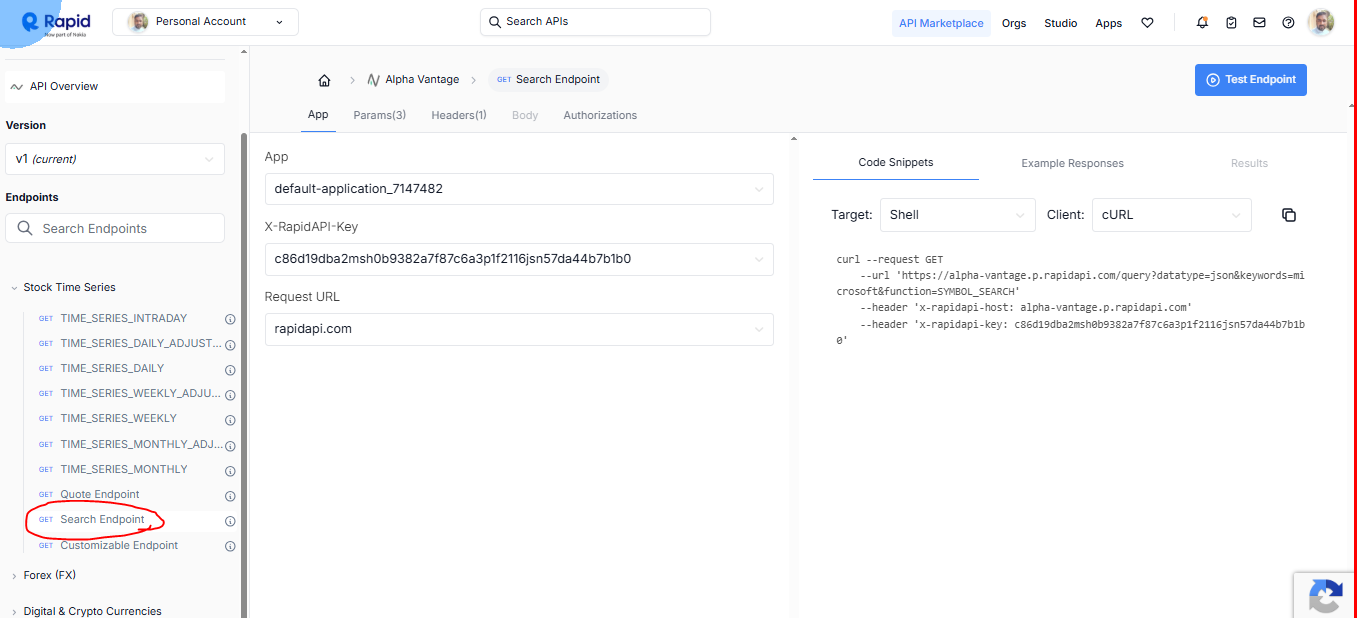
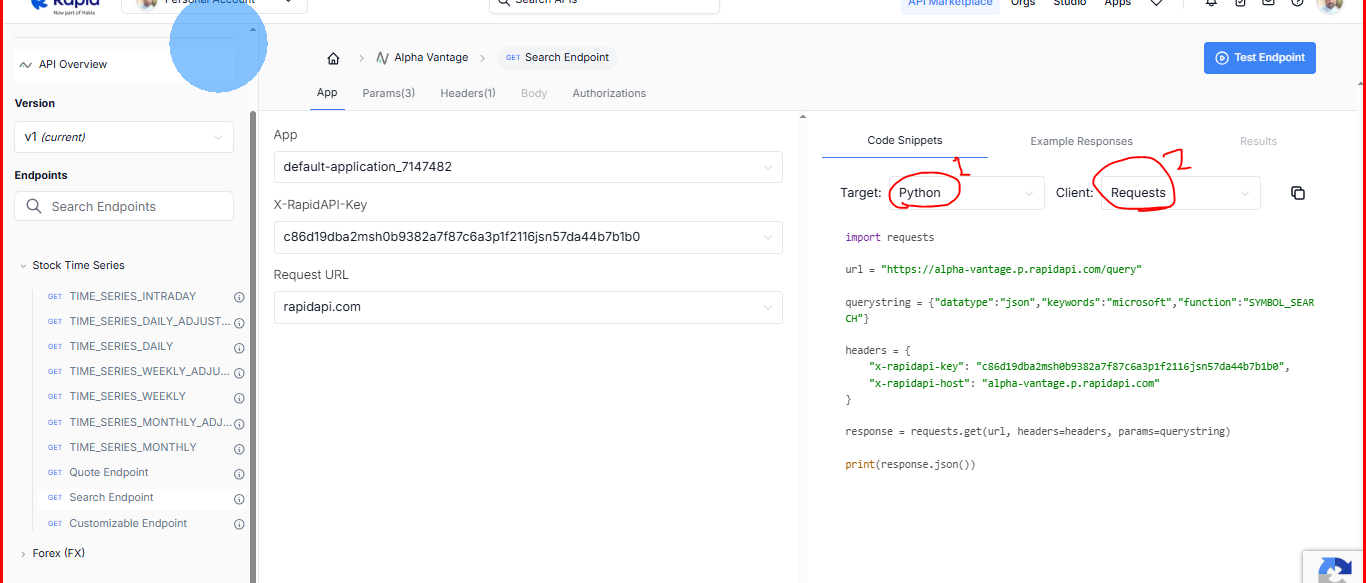

In [4]:
# The below code is coppied from Alpha Vantage site frm browser - Code snippets tab & made some changes like company is added and replaced the api key with st.secrets:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

company = "State Bank of India"

querystring = {"datatype": "json", "keywords": company, "function": "SYMBOL_SEARCH"}

headers = {
    "x-rapidapi-key": st.secrets["API_KEY"],
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'bestMatches': [{'1. symbol': 'SBIN.BSE', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '1.0000'}, {'1. symbol': 'SBKFF', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '1.0000'}, {'1. symbol': 'SID.FRK', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'Frankfurt', '5. marketOpen': '08:00', '6. marketClose': '20:00', '7. timezone': 'UTC+02', '8. currency': 'EUR', '9. matchScore': '1.0000'}, {'1. symbol': 'SBID.LON', '2. name': 'State Bank of India GDR', '3. type': 'Equity', '4. region': 'United Kingdom', '5. marketOpen': '08:00', '6. marketClose': '16:30', '7. timezone': 'UTC+01', '8. currency': 'USD', '9. matchScore': '0.9048'}]}


In [5]:
import pandas as pd

data = response.json()["bestMatches"]
search = pd.DataFrame(data)
search

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


# Daily Stock Data for SBIN.BSE
1. SBIN.BSE this we have taken from abv o/p
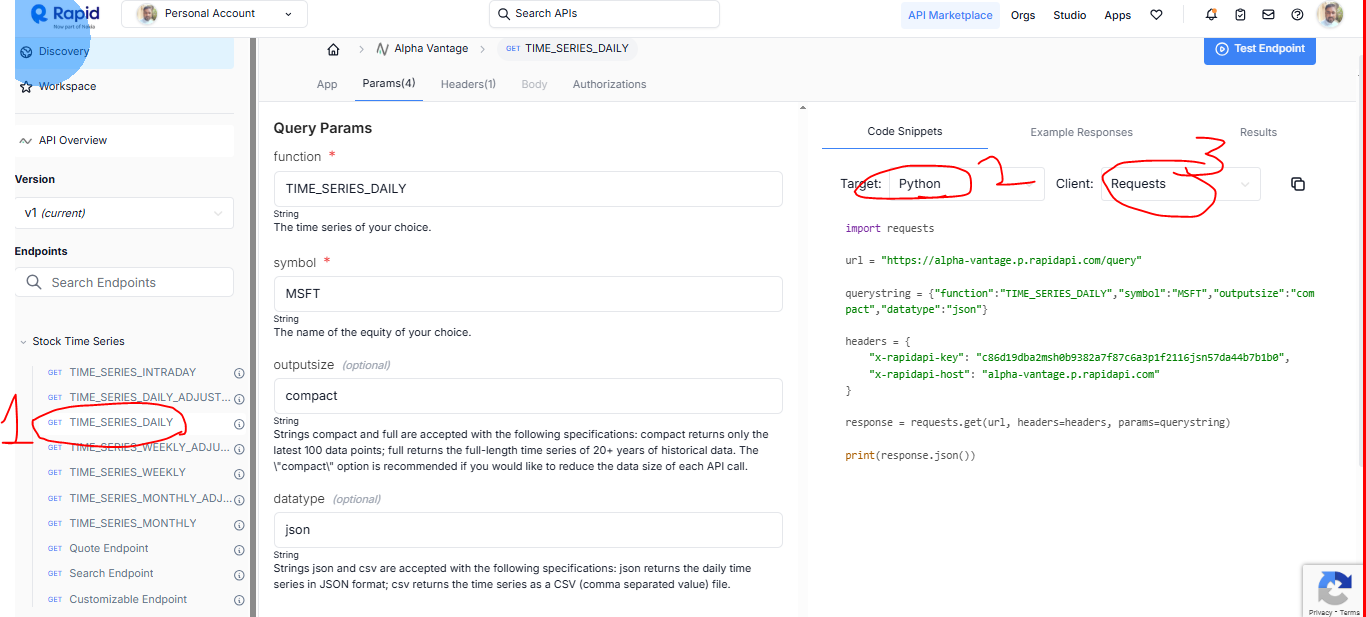

In [19]:
# Again below code is coppied from code snippets tab frm Alpha Vantage page & few updates made as abv

import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

symbol = "SBIN.BSE"

querystring = {
    "function": "TIME_SERIES_DAILY",
    "symbol": symbol,
    "outputsize": "compact",
    "datatype": "json",
}

headers = {
    "x-rapidapi-key": st.secrets["API_KEY"],
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SBIN.BSE', '3. Last Refreshed': '2025-09-19', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-09-19': {'1. open': '852.5000', '2. high': '863.5000', '3. low': '849.0500', '4. close': '862.2500', '5. volume': '552336'}, '2025-09-18': {'1. open': '856.7000', '2. high': '860.9000', '3. low': '851.0500', '4. close': '854.4500', '5. volume': '719272'}, '2025-09-17': {'1. open': '833.2500', '2. high': '858.0000', '3. low': '831.0000', '4. close': '856.9500', '5. volume': '1807341'}, '2025-09-16': {'1. open': '823.4000', '2. high': '833.0000', '3. low': '821.6000', '4. close': '831.8000', '5. volume': '368364'}, '2025-09-15': {'1. open': '823.3000', '2. high': '828.0000', '3. low': '821.4000', '4. close': '824.9000', '5. volume': '139666'}, '2025-09-12': {'1. open': '824.9000', '2. high': '825.3500', '3. low': '819.9000', '4. close': '823.3000', '5. vol

In [8]:
response.json().keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [10]:
data = response.json()["Time Series (Daily)"]
df_sbin = pd.DataFrame(data).T
df_sbin

,1. open,2. high,3. low,4. close,5. volume
2025-09-19,852.5000,863.5000,849.0500,862.2500,552336
2025-09-18,856.7000,860.9000,851.0500,854.4500,719272
2025-09-17,833.2500,858.0000,831.0000,856.9500,1807341
2025-09-16,823.4000,833.0000,821.6000,831.8000,368364
2025-09-15,823.3000,828.0000,821.4000,824.9000,139666
...,...,...,...,...,...
2025-05-07,762.2500,782.5500,762.2500,776.1500,581175
2025-05-06,792.2000,799.0000,771.1500,774.1500,761282
2025-05-05,784.9500,799.1000,783.6500,790.0000,771587
2025-05-02,792.0500,802.9500,789.2500,800.0500,335006


In [11]:
df_sbin.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [13]:
df_sbin = df_sbin.astype(float).round(2)  # This is to convert the data type
df_sbin

,1. open,2. high,3. low,4. close,5. volume
2025-09-19,852.50,863.50,849.05,862.25,552336.0
2025-09-18,856.70,860.90,851.05,854.45,719272.0
2025-09-17,833.25,858.00,831.00,856.95,1807341.0
2025-09-16,823.40,833.00,821.60,831.80,368364.0
2025-09-15,823.30,828.00,821.40,824.90,139666.0
...,...,...,...,...,...
2025-05-07,762.25,782.55,762.25,776.15,581175.0
2025-05-06,792.20,799.00,771.15,774.15,761282.0
2025-05-05,784.95,799.10,783.65,790.00,771587.0
2025-05-02,792.05,802.95,789.25,800.05,335006.0


In [14]:
df_sbin.index

Index(['2025-09-19', '2025-09-18', '2025-09-17', '2025-09-16', '2025-09-15',
       '2025-09-12', '2025-09-11', '2025-09-10', '2025-09-09', '2025-09-08',
       '2025-09-05', '2025-09-04', '2025-09-03', '2025-09-02', '2025-09-01',
       '2025-08-29', '2025-08-28', '2025-08-26', '2025-08-25', '2025-08-22',
       '2025-08-21', '2025-08-20', '2025-08-19', '2025-08-18', '2025-08-14',
       '2025-08-13', '2025-08-12', '2025-08-11', '2025-08-08', '2025-08-07',
       '2025-08-06', '2025-08-05', '2025-08-04', '2025-08-01', '2025-07-31',
       '2025-07-30', '2025-07-29', '2025-07-28', '2025-07-25', '2025-07-24',
       '2025-07-23', '2025-07-22', '2025-07-21', '2025-07-18', '2025-07-17',
       '2025-07-16', '2025-07-15', '2025-07-14', '2025-07-11', '2025-07-10',
       '2025-07-09', '2025-07-08', '2025-07-07', '2025-07-04', '2025-07-03',
       '2025-07-02', '2025-07-01', '2025-06-30', '2025-06-27', '2025-06-26',
       '2025-06-25', '2025-06-24', '2025-06-23', '2025-06-20', '2025-06-19',

In [17]:
# Conver index to datetime type for 1st col of abv o/p i.e.date col
df_sbin.index = pd.to_datetime(df_sbin.index)
# Name the index as date for 1st col
df_sbin.index.name = "date"
df_sbin.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-19,852.50,863.5,849.05,862.25,552336.0
2025-09-18,856.70,860.9,851.05,854.45,719272.0
2025-09-17,833.25,858.0,831.00,856.95,1807341.0
2025-09-16,823.40,833.0,821.60,831.80,368364.0
2025-09-15,823.30,828.0,821.40,824.90,139666.0


In [18]:
# Save abv o/p to CSV
df_sbin.to_csv("sbin.csv")

# Plot abv chart as candlestick
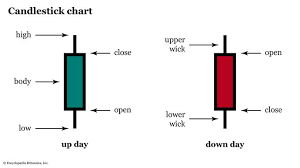

In [24]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df_sbin.index,
            open=df_sbin["1. open"],
            high=df_sbin["2. high"],
            low=df_sbin["3. low"],
            close=df_sbin["4. close"],
        )
    ]
)
fig.update_layout(width=1200, height=800)
fig.show()